In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import alen, arange
import math
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

#### PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
#BPSO

def pls_optimise_components(X, y, npc):
 
    rmsecv = np.zeros(npc)
    for i in range(1,npc+1,1):
 
        # Simple PLS
        pls_simple = PLSRegression(n_components=i)
        # Fit
        pls_simple.fit(X, y)
        #cv = LeaveOneOut()
        cv=10
        # Cross-validation
        y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
        # Calculate scores
        score = r2_score(y, y_cv)
        rmsecv[i-1] = np.sqrt(mean_squared_error(y, y_cv))
 
    # Find the minimum of ther RMSE and its location
    opt_comp, rmsecv_min = np.argmin(rmsecv),  rmsecv[np.argmin(rmsecv)]
 
    return (opt_comp+1, rmsecv_min)

def base_pls(X,y,n_components, return_model=False):
 
    # Simple PLS
    pls_simple = PLSRegression(n_components=n_components)
    # Fit
    pls_simple.fit(X, y)
    #cv = 10
    cv= 10
    # Cross-validation
    y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
    # Calculate scores
    score = r2_score(y, y_cv)
    rmsecv = np.sqrt(mean_squared_error(y, y_cv))
 
    if return_model == False:
        return(y_cv, score, rmsecv)
    else:
        return(y_cv, score, rmsecv, pls_simple)
    
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create an instance 
#reg = linear_model.LinearRegression

# Define objective function
def f_per_particle(m, alpha):

    total_features = dimensions
    # Get the subset of the features from the binary mask

    if np.count_nonzero(m) == 0:
        X_subset = X_train
    else:
        X_subset = X_train[:,m==1]

    opt_comp, rmsecv_min = pls_optimise_components(X_subset, y_train_moisture, 8)
    predicted, r2cv, rmscv = base_pls(X_subset, y_train_moisture, opt_comp)
    
    P = r2cv

    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [3]:
df = pd.read_excel('../Data/Cacao/NIRS spectrum Cocoa Beans.xlsx', skiprows=[0,1,2,3,4,5])

In [4]:
df.head()

,sample Num,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,...,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,Moisture Content (%),Fat Content (%)
0,1,0.455245,0.455134,0.454986,0.455009,0.454722,0.454652,0.454516,0.454527,0.454581,...,1.240786,1.244121,1.246720,1.249081,1.250945,1.252397,1.253387,1.254267,8.17,39.11000
1,2,0.485282,0.485407,0.485407,0.485478,0.485399,0.485284,0.485150,0.485174,0.485439,...,1.263340,1.266759,1.269205,1.271461,1.273356,1.274930,1.276129,1.277142,7.52,39.14000
2,3,0.504128,0.503784,0.503550,0.503983,0.503992,0.503576,0.503656,0.503647,0.503327,...,1.298061,1.301578,1.304317,1.306653,1.308487,1.310115,1.310987,1.311702,8.52,42.35439
3,4,0.470077,0.469761,0.469780,0.469852,0.469783,0.469600,0.469520,0.469439,0.469648,...,1.240584,1.243668,1.246182,1.248631,1.250560,1.252181,1.253309,1.254296,8.65,42.71632
4,5,0.495356,0.495335,0.495513,0.495504,0.495303,0.495128,0.495118,0.495339,0.495136,...,1.300846,1.304284,1.306948,1.309266,1.311007,1.312586,1.313464,1.314298,7.66,38.57000


In [5]:
df.describe()

,sample Num,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,...,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,Moisture Content (%),Fat Content (%)
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,36.50000,0.553672,0.553252,0.553195,0.553385,0.553181,0.552734,0.552676,0.552743,0.552677,...,1.355246,1.358534,1.361217,1.363559,1.365416,1.367055,1.368250,1.369333,9.036111,40.319422
std,20.92845,0.058118,0.058024,0.058001,0.057977,0.057892,0.057755,0.057687,0.057656,0.057599,...,0.077153,0.077181,0.077192,0.077227,0.077250,0.077317,0.077330,0.077353,1.276969,2.153408
min,1.00000,0.453846,0.453121,0.453382,0.453692,0.453737,0.453246,0.453506,0.453738,0.453617,...,1.169063,1.172108,1.174711,1.176826,1.178704,1.180210,1.181361,1.182412,6.740000,35.259180
25%,18.75000,0.506507,0.506184,0.505822,0.506032,0.506154,0.505824,0.505751,0.505866,0.505862,...,1.302396,1.305891,1.308618,1.311181,1.313362,1.315192,1.316658,1.318237,8.087500,38.551392
50%,36.50000,0.539088,0.538746,0.538902,0.539029,0.538547,0.538157,0.538385,0.538500,0.538432,...,1.358992,1.362210,1.364917,1.367153,1.368977,1.370487,1.371482,1.372305,8.785000,40.126075
75%,54.25000,0.590582,0.589999,0.590054,0.590657,0.590543,0.590027,0.590106,0.590380,0.590249,...,1.411312,1.414535,1.417293,1.419362,1.421241,1.423092,1.424101,1.424838,9.562500,41.927608
max,72.00000,0.726047,0.725450,0.725075,0.725353,0.725137,0.724066,0.723827,0.723877,0.723535,...,1.495987,1.499257,1.501925,1.504354,1.505840,1.507209,1.508215,1.509087,12.080000,45.745860


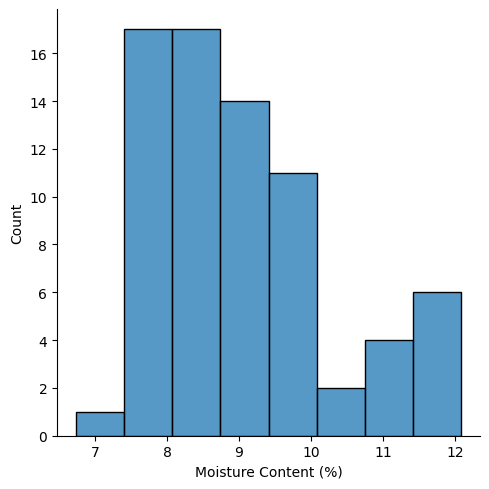

In [6]:
sns.displot(df['Moisture Content (%)'])

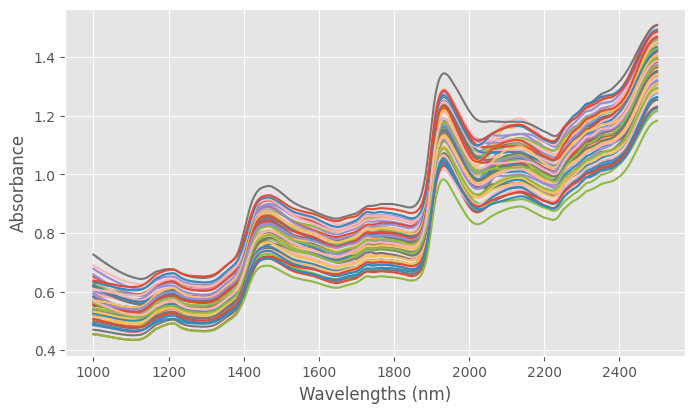

In [7]:
wl = np.arange(0, 1557, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(df.iloc[:,1:-2].columns.astype('float'), df.iloc[:,1:-2].values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [9]:
df_pretreat = df.iloc[:, 1:-2]
df_pretreat['Moisture'] = df['Moisture Content (%)']
df_pretreat['Fat'] = df['Fat Content (%)']

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,1003.4,...,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,Umidade,Oleo,class
0,0.455245,0.455134,0.454986,0.455009,0.454722,0.454652,0.454516,0.454527,0.454581,0.454121,...,1.244121,1.246720,1.249081,1.250945,1.252397,1.253387,1.254267,8.17,39.11000,8
1,0.485282,0.485407,0.485407,0.485478,0.485399,0.485284,0.485150,0.485174,0.485439,0.485027,...,1.266759,1.269205,1.271461,1.273356,1.274930,1.276129,1.277142,7.52,39.14000,7
2,0.504128,0.503784,0.503550,0.503983,0.503992,0.503576,0.503656,0.503647,0.503327,0.503167,...,1.301578,1.304317,1.306653,1.308487,1.310115,1.310987,1.311702,8.52,42.35439,8
3,0.470077,0.469761,0.469780,0.469852,0.469783,0.469600,0.469520,0.469439,0.469648,0.469371,...,1.243668,1.246182,1.248631,1.250560,1.252181,1.253309,1.254296,8.65,42.71632,8
4,0.495356,0.495335,0.495513,0.495504,0.495303,0.495128,0.495118,0.495339,0.495136,0.494884,...,1.304284,1.306948,1.309266,1.311007,1.312586,1.313464,1.314298,7.66,38.57000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.531292,0.531020,0.531025,0.531059,0.530728,0.530695,0.530682,0.530544,0.530473,0.530129,...,1.328583,1.331169,1.333331,1.335376,1.336930,1.338208,1.339247,9.29,36.49000,9
68,0.562554,0.561740,0.561738,0.561947,0.561595,0.561129,0.560805,0.561056,0.561145,0.560480,...,1.358452,1.361082,1.363400,1.365379,1.367021,1.368361,1.369579,8.02,41.30000,8
69,0.568236,0.567240,0.566910,0.567055,0.567055,0.566737,0.566292,0.566399,0.566378,0.565690,...,1.375548,1.377898,1.380177,1.382207,1.383946,1.385091,1.386256,7.70,38.89000,7
70,0.506851,0.506549,0.506719,0.506860,0.506715,0.506356,0.505974,0.506092,0.506115,0.505547,...,1.221233,1.223662,1.225670,1.227327,1.228799,1.229593,1.230324,7.77,39.37000,7


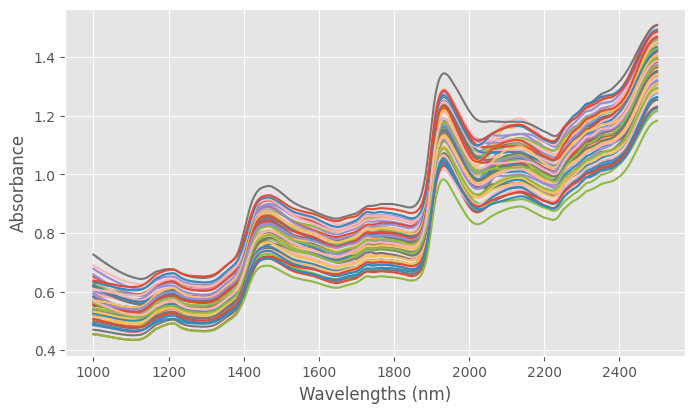

In [11]:
wl = np.arange(0, 1557, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(df.iloc[:,1:-2].columns.astype('float'), df_pretreat.iloc[:,:-3].values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

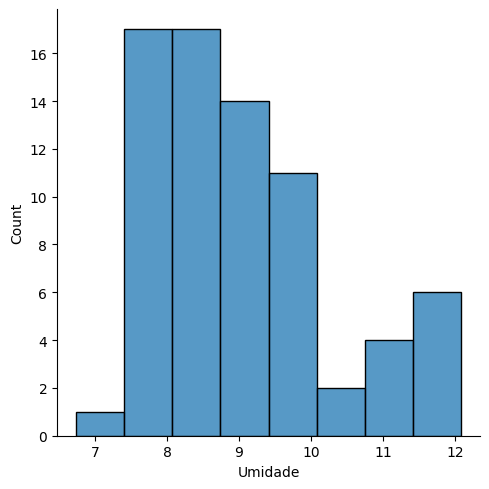

In [13]:
sns.displot(df_pretreat['Moisture'])

In [16]:
df_pretreat['class'] = 0
for index, row in df_pretreat.iterrows():
    if row['Moisture'] < 8:
        df_pretreat.loc[index, 'class'] = 0
    elif row['Moisture'] < 9:
        df_pretreat.loc[index, 'class'] = 1
    elif row['Moisture'] < 10:
        df_pretreat.loc[index, 'class'] = 2
    else:
        df_pretreat.loc[index, 'class'] = 3

In [17]:
y = df_pretreat[['Moisture','Fat','class']]

## Do not take the reference value and the class

X = df_pretreat.values[:, :-3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,stratify=y['class'])

y_train_moisture = y_train['Moisture']
y_test_moisture = y_test['Moisture']



In [18]:
###Data preprocessing

X_train = snv(X_train)
X_test = snv(X_test)

X_train = savgol_filter(X_train, 3, polyorder=2, deriv=1)
X_test = savgol_filter(X_test, 3, polyorder=2, deriv=1)

In [19]:
X_train.shape[1]
wl_list = np.arange(0, 1557, 1)
wl_list1 = np.arange(0, 1557, 1)

In [ ]:
# Import PySwarms
import pyswarms as ps

# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}

# Call instance of PSO
dimensions = X_train.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
l_col=[]
best = 10
best1 = 15
n=0
while best < best1 :
    try:
        if n >0 :
            if n >1 :
                ## Get the selected features at iteration i-1
                X_train1 = (np.delete(X_train1, m_array1,1))
                X_test1 = (np.delete(X_test1, m_array1,1))
                wl_list1 = np.delete(wl_list1, m_array1)
                m_array1 = m_array
            if n ==1 :
                X_train1 = X_train
                X_test1 = X_test
                m_array1 = m_array

            ## Get the selected features at iteration i
            X_train = (np.delete(X_train, m_array,1))
            X_test = (np.delete(X_test, m_array,1))
            dimensions = X_train.shape[1]
            options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}
            optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
            best1 = best
            ##Save the selected features at iteration i-1
            m_array1 = m_array

        # if  X_train.shape[1]<30:
        #     opt_comp = 3
        #     options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 20, 'p':1}
        #     optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)
        

        if X_train.shape[1] < 20:
            break

        # Perform optimization
        cost, pos = optimizer.optimize(f, iters=100, verbose=2)
        optimizer.reset()
        best = round(cost,3)
        print(best)            
        m_array = np.where(pos == 0)
        print(X_train.shape)
        print(n)
        wl_list = np.delete(wl_list, m_array)
        n +=1
        
    except:
        break
        print('break')
    


In [ ]:
ls_score_pls = []
n_opt = 8
for i in range(3,9):
    pls_simple = PLSRegression(n_components=i)
    cv = LeaveOneOut()
    #cv = 10

    X1 = X_train1 
    #X1 = X_train[:,pos==1] 

    X2 = X_test1
    #X2 = X_test[:,pos==1] 


    # Fit
    pls_simple.fit(X1, y_train_moisture)


    # Cross-validation
    y_cv = cross_val_predict(pls_simple,X1, y_train_moisture, cv=cv)
    y_pred = pls_simple.predict(X2)
    score = r2_score(y_train_moisture, y_cv)
    if ls_score_pls:
        if score< ls_score_pls[-1] and i>4:
            n_opt =  i-1
            break

    ls_score_pls.append(score)

pls_simple = PLSRegression(n_components=n_opt)
cv = LeaveOneOut()
# cv = 10

X1 = X_train1 
#X1 = X_train[:,pos==1] 

X2 = X_test1
#X2 = X_test[:,pos==1] 
X = np.concatenate((X_train1, X_test1))
y = pd.concat([y_train, y_test], axis=0)
#y = np.concatenate((y_train, y_test))

# Fit
pls_simple.fit(X1, y_train_moisture)


# Cross-validation
y_cv = cross_val_predict(pls_simple,X1, y_train_moisture, cv=cv)
y_pred = pls_simple.predict(X2)
y_pred_tot = pls_simple.predict(X)
# Calculate scores
score = r2_score(y_train_moisture, y_cv)
score_train = mean_squared_error(y_train_moisture, y_cv,squared=False)
score_test = mean_squared_error(y_test_moisture, y_pred,squared=False)

score_tot = r2_score(y['Moisture'], y_pred_tot)
score_rmse_tot = mean_squared_error(y['Moisture'], y_pred_tot,squared=False)

print('N comp: ', n_opt)
print('N Wave: ', X_train1.shape)
print('R2CV: ', score)
print('RMSECV: ', score_train)
print('RMSE test: ', score_test)


print('Pour comparaison')
print('R2: ', score_tot)
print('RMSE: ', score_rmse_tot)